In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

print(" Libraries imported successfully!")

 Libraries imported successfully!


In [3]:
trader_file = "/content/historical_data.csv"
sentiment_file = "/content/fear_greed_index.csv"

df_trades = pd.read_csv(trader_file)
df_sent = pd.read_csv(sentiment_file)

print(" Datasets loaded successfully!")
print("\nTrading data shape:", df_trades.shape)
print("Sentiment data shape:", df_sent.shape)

 Datasets loaded successfully!

Trading data shape: (211224, 16)
Sentiment data shape: (2644, 4)


In [4]:
print("\n--- Trading Data ---")
display(df_trades.head())

print("\n--- Sentiment Data ---")
display(df_sent.head())


--- Trading Data ---


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



--- Sentiment Data ---


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
print("\n--- Trading Data ---")
display(df_trades.head())

print("\n--- Sentiment Data ---")
display(df_sent.head())


--- Trading Data ---


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



--- Sentiment Data ---


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], errors='coerce')
df_sent['date'] = pd.to_datetime(df_sent['date'], errors='coerce')

df_trades['date'] = df_trades['Timestamp IST'].dt.date
df_sent['date'] = df_sent['date'].dt.date

df_trades = df_trades.dropna(subset=['date'])
df_sent = df_sent.dropna(subset=['date'])

print(" Cleaned and added date columns!")

 Cleaned and added date columns!


In [11]:
agg = df_trades.groupby('date').agg(
    total_volume=('Size USD', 'sum'),
    avg_leverage=('Start Position', 'mean'),
    total_profit=('Closed PnL', 'sum'),
    trade_count=('Account', 'count')
).reset_index()

print("✅ Aggregated daily trading data:")
display(agg.head())

✅ Aggregated daily trading data:


,date,total_volume,avg_leverage,total_profit,trade_count
0,2023-01-05,477.00,0.091933,0.000000,3
1,2023-05-12,50005.83,2.513867,0.000000,9
2,2024-01-01,264239.53,414.773256,-129.531460,18
3,2024-01-02,2008.18,18562.666667,0.000000,6
4,2024-01-03,472974.70,375587.745255,8244.241409,137


In [13]:
merged = pd.merge(agg, df_sent[['date', 'classification']], on='date', how='inner')

print("Merged dataset ready:")
display(merged.head())

Merged dataset ready:


,date,total_volume,avg_leverage,total_profit,trade_count,classification
0,2023-01-05,477.00,0.091933,0.000000,3,Fear
1,2023-05-12,50005.83,2.513867,0.000000,9,Neutral
2,2024-01-01,264239.53,414.773256,-129.531460,18,Greed
3,2024-01-02,2008.18,18562.666667,0.000000,6,Greed
4,2024-01-03,472974.70,375587.745255,8244.241409,137,Greed


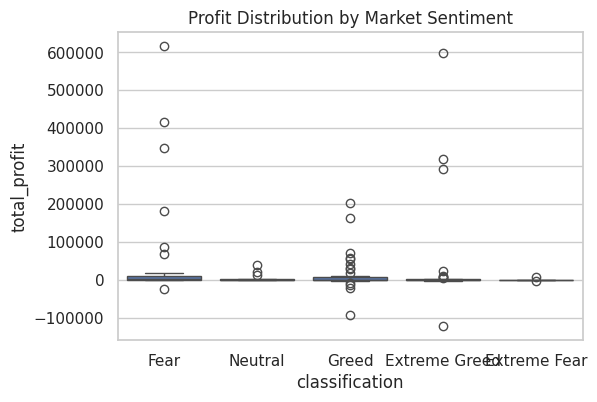

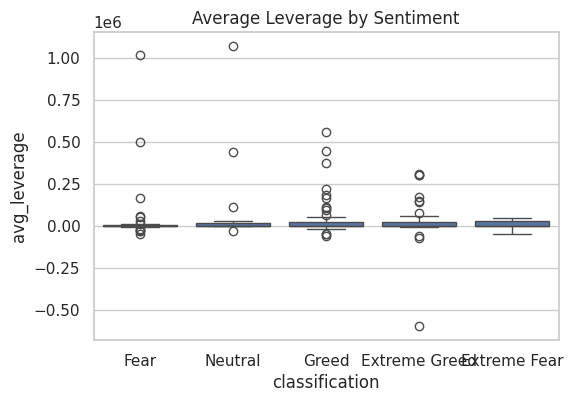

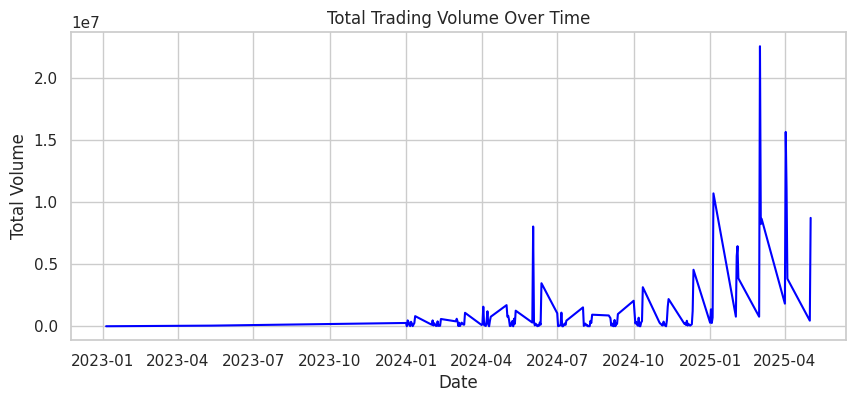

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='total_profit', data=merged)
plt.title("Profit Distribution by Market Sentiment")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='classification', y='avg_leverage', data=merged)
plt.title("Average Leverage by Sentiment")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(merged['date'], merged['total_volume'], color='blue')
plt.title("Total Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.show()

In [16]:
merged.to_csv("merged_trader_sentiment.csv", index=False)
print(" Saved merged data to merged_trader_sentiment.csv")

 Saved merged data to merged_trader_sentiment.csv


In [18]:
print(" Average profit on Greed days:",
      merged.loc[merged['classification']=='Greed','total_profit'].mean())

print(" Average profit on Fear days:",
      merged.loc[merged['classification']=='Fear','total_profit'].mean())

print(" Observation: Compare average leverage and volume to see how traders behave under different moods!")

 Average profit on Greed days: 10886.295225642856
 Average profit on Fear days: 48087.17790956756
 Observation: Compare average leverage and volume to see how traders behave under different moods!
